<a href="https://colab.research.google.com/github/Clarkpriestly/My-Projects/blob/main/Heart_Disease_Risk_Prediction_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
mahatiratusher_heart_disease_risk_prediction_dataset_path = kagglehub.dataset_download('mahatiratusher/heart-disease-risk-prediction-dataset')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,ConfusionMatrixDisplay, confusion_matrix

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-risk-prediction-dataset/heart_disease_risk_dataset_earlymed.xls
/kaggle/input/heart-disease-risk-prediction-dataset/heart_disease_risk_dataset_earlymed.csv


In [ ]:
# Loading in the data
heart_disease = pd.read_csv("/kaggle/input/heart-disease-risk-prediction-dataset/heart_disease_risk_dataset_earlymed.csv")
heart_disease.head()

,Chest_Pain,Shortness_of_Breath,Fatigue,Palpitations,Dizziness,Swelling,Pain_Arms_Jaw_Back,Cold_Sweats_Nausea,High_BP,High_Cholesterol,Diabetes,Smoking,Obesity,Sedentary_Lifestyle,Family_History,Chronic_Stress,Gender,Age,Heart_Risk
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,48.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,46.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,66.0,0.0
3,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,60.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0


In [ ]:
# Checking for null or empty values and the shape of the dataset
print(heart_disease.isnull().values.any())
heart_disease.shape

False


(70000, 19)

In [ ]:
# Selecting target and features variable from dataset
features = heart_disease.drop('Heart_Risk', axis = 1)
target = heart_disease['Heart_Risk']

# Splitting dataset into test and train datasets based on the 80% train, 20% test rule
X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    test_size = 0.2,
                                                    random_state = 42)

NORMALIZATION OF FEATURES VARIABLE USING THE Z-SCORE STANDARDIZATION METHOD OF VARIABLES TO A MEAN OF 0 AND A STANDARD DEVIATION OF 1

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardizing the features variable
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

SELECTING THE BEST CONTRIBUTING FEATURES TO THE TARGET VARIABLE USING ANOVA. VARIABLES WITH HIGH F-SCORES CONTRIBUTE THE MOST. SELECTING k NUMBER OF FEATURES WITH THE HIGHEST F-SCORES.

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Performing ANOVA to select the top K features
k = 9
anova_select_feature = SelectKBest(score_func = f_classif, k = k)
X_train_selected = anova_select_feature.fit_transform(X_train_scaled, y_train)
X_test_selected = anova_select_feature.transform(X_test_scaled)

# Retrieve anova scores for all tests
anova_scores = anova_select_feature.scores_

# Mapping features to their anova F-scores
feature_names = features.columns
anova_results = dict(zip(feature_names, anova_scores))

# Display anova results
print("ANOVA F-scores for Features:")
for feature, score in anova_results.items():
    print(f"{feature}: {score:.2f}")

# Selected feature indices and names
selected_feature_indices = anova_select_feature.get_support(indices=True)
selected_features = feature_names[selected_feature_indices]
print("\nSelected Features (Top k):", list(selected_features))

ANOVA F-scores for Features:
Chest_Pain: 31161.34
Shortness_of_Breath: 31358.66
Fatigue: 31546.21
Palpitations: 30821.25
Dizziness: 31382.39
Swelling: 31335.31
Pain_Arms_Jaw_Back: 31499.29
Cold_Sweats_Nausea: 31635.56
High_BP: 11045.77
High_Cholesterol: 10927.36
Diabetes: 10401.19
Smoking: 10589.69
Obesity: 10702.66
Sedentary_Lifestyle: 11052.71
Family_History: 10596.53
Chronic_Stress: 10752.83
Gender: 5373.82
Age: 32349.39

Selected Features (Top k): ['Chest_Pain', 'Shortness_of_Breath', 'Fatigue', 'Palpitations', 'Dizziness', 'Swelling', 'Pain_Arms_Jaw_Back', 'Cold_Sweats_Nausea', 'Age']


TRAINING THE MACHINE LEARNING MODELS

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train_scaled,y_train)

y_pred_lr = lr_model.predict(X_test_scaled)

print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      6998
         1.0       0.99      0.99      0.99      7002

    accuracy                           0.99     14000
   macro avg       0.99      0.99      0.99     14000
weighted avg       0.99      0.99      0.99     14000



In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state = 42)
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)

print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      6998
         1.0       0.98      0.98      0.98      7002

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000



In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      6998
         1.0       0.99      0.99      0.99      7002

    accuracy                           0.99     14000
   macro avg       0.99      0.99      0.99     14000
weighted avg       0.99      0.99      0.99     14000



# Confusion Matrix using the test data
Comparing the different models' abilities to predict labels rightfully

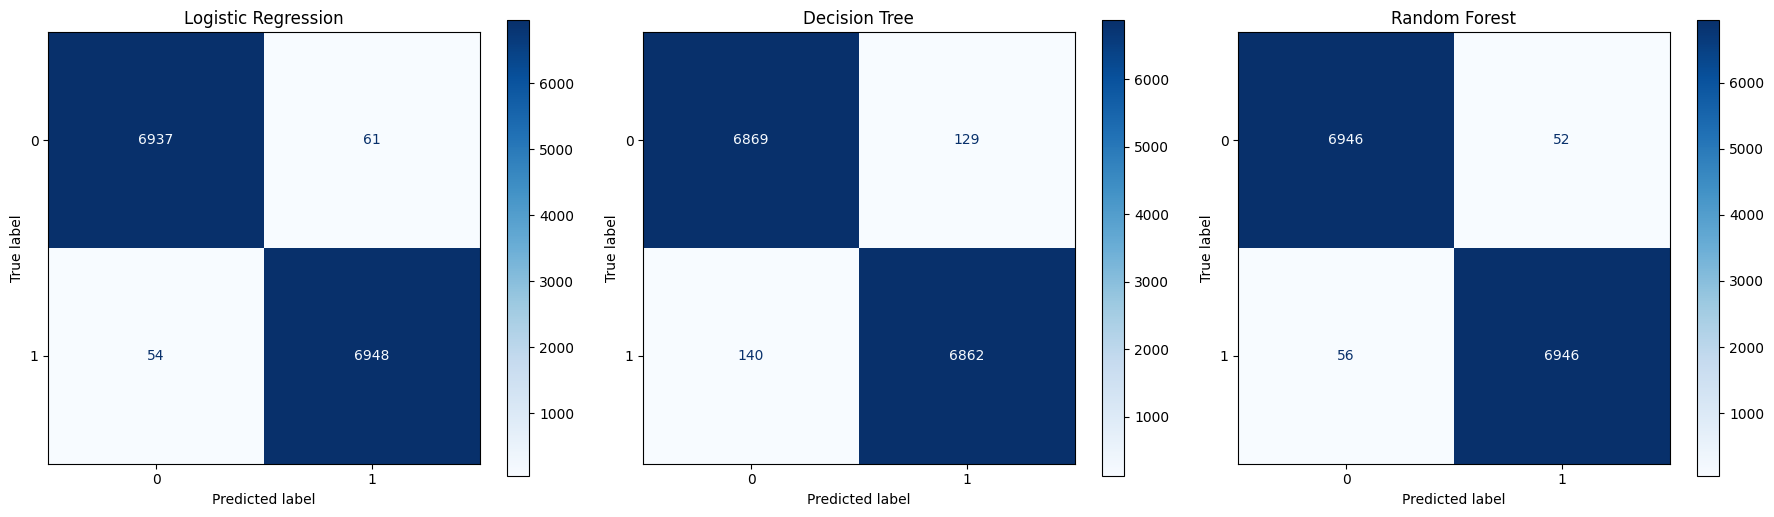

In [ ]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Model names and predictions
models = ["Logistic Regression", "Decision Tree", "Random Forest"]
y_preds = [y_pred_lr, y_pred_dt, y_pred_rf]

# Plot each confusion matrix
for i, (model, y_pred) in enumerate(zip(models, y_preds)):
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
    disp.plot(ax=axes[i], cmap= "Blues", values_format="d")
    axes[i].set_title(model)

plt.tight_layout()
plt.show()

From our results, we can see that though all three models had high accuracies, there are significant differences in how correctly the models predicted the labels i.e Heart risk. RandomForest predicted 6945 labels as truelly not having Heart risk (0) meanwhile LogisticRegression predicted 6937, and DecisionTree predicted 6869 for the True Positives. The DecisionTree performed badly amongst the others since it had high numbers for the False Positive (129) and False Negative (140)

Author: Ireneaus Nyame